In [3]:
from src.dataset.build import build_dataloader
import torch 

dataset, dataloader = build_dataloader(
    name="uvg-raw",
    data_path="../uvg-raw/beauty.yuv",
    batch_size=5,
    frame_interval=4,
    crop_size=(720, 1080),
)

data = next(iter(dataloader)).permute(0, 4, 1, 2, 3).cuda()

data = torch.mul(data, 255)

data.shape
#print(data[0][0])
#print(data[0][0].type(torch.uint8))

torch.Size([5, 3, 4, 720, 1080])

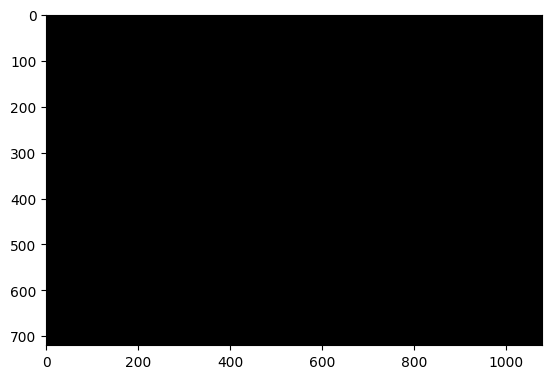

In [4]:
import matplotlib.pyplot as plt
import numpy as np

data = data.permute(0, 2, 1, 3, 4)
plt.imshow(data[0][0].cpu().numpy().astype(np.uint8))

In [5]:
dataset, dataloader = build_dataloader(
    name="uvghd30",
    data_path="data/uvghd30/uvghd30.mp4",
    batch_size=5,
    frame_interval=4,
    crop_size=(720, 1080)
)

data = next(iter(dataloader)).permute(0, 4, 1, 2, 3).cuda()

print(data)
data = torch.mul(data, 255)

# data

tensor([[[[[0.0745, 0.0745, 0.0745,  ..., 0.4275, 0.4353, 0.4510],
           [0.0745, 0.0745, 0.0745,  ..., 0.4235, 0.4314, 0.4510],
           [0.0745, 0.0745, 0.0784,  ..., 0.4235, 0.4314, 0.4510],
           ...,
           [0.0667, 0.0627, 0.0627,  ..., 0.5647, 0.5608, 0.5490],
           [0.0667, 0.0627, 0.0627,  ..., 0.5686, 0.5608, 0.5490],
           [0.0667, 0.0667, 0.0667,  ..., 0.5725, 0.5647, 0.5569]],

          [[0.0745, 0.0745, 0.0745,  ..., 0.4157, 0.4157, 0.4314],
           [0.0745, 0.0745, 0.0745,  ..., 0.4235, 0.4157, 0.4314],
           [0.0745, 0.0745, 0.0784,  ..., 0.4235, 0.4157, 0.4314],
           ...,
           [0.0667, 0.0627, 0.0627,  ..., 0.5804, 0.5843, 0.5725],
           [0.0667, 0.0627, 0.0627,  ..., 0.5843, 0.5922, 0.5765],
           [0.0667, 0.0667, 0.0667,  ..., 0.5882, 0.5922, 0.5765]],

          [[0.0745, 0.0745, 0.0745,  ..., 0.4353, 0.4235, 0.4157],
           [0.0745, 0.0745, 0.0745,  ..., 0.4431, 0.4275, 0.4157],
           [0.0745, 0.0745